Part 1 Section 2 - Normalize and Clean Data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data.csv")
# Get a warning that columns 0, 4, 5, 6 and 7 have mixed types. May need to clean this later
df.head()

C:\Users\jpo-0\AppData\Local\Temp\ipykernel_13608\3136517679.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


Id                                              Title  \
0  37404348                           Casual Stock Replenisher   
1  37404337                           Casual Stock Replenisher   
2  37404356  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3  37404330                              Team member - Belrose   
4  37404308  Business Banking Contact Centre Specialist, Ni...   

                                          Company                      Date  \
0                                     Aldi Stores  2018-10-07T00:00:00.000Z   
1                                     Aldi Stores  2018-10-07T00:00:00.000Z   
2                             LB Creative Pty Ltd  2018-10-07T00:00:00.000Z   
3                          Anaconda Group Pty Ltd  2018-10-07T00:00:00.000Z   
4  Commonwealth Bank - Business & Private Banking  2018-10-07T00:00:00.000Z   

                  Location                         Area  \
0                   Sydney  North West & Hills District   
1    Richmond & Hawkesbury                          NaN   
2                 Brisbane          CBD & Inner Suburbs   
3  Gosford & Central Coast                          NaN   
4                   Sydney        Ryde & Macquarie Park   

                   Classification  SubClassification  \
0      Retail & Consumer Products  Retail Assistants   
1      Retail & Consumer Products  Retail Assistants   
2      Retail & Consumer Products  Retail Assistants   
3      Retail & Consumer Products  Retail Assistants   
4  Call Centre & Customer Service    Sales - Inbound   

                                         Requirement FullDescription  \
0  Our Casual Stock Replenishers pride themselves...             NaN   
1  Our Casual Stock Replenishers pride themselves...             NaN   
2  BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA             NaN   
3  Bring it on - do you love the great outdoors a...             NaN   
4  We are seeking highly articulate, enthusiastic...             NaN   

   LowestSalary  HighestSalary JobType  
0             0             30     NaN  
1             0             30     NaN  
2             0             30     NaN  
3             0             30     NaN  
4             0             30     NaN

Step 1 - Create Average Salary column

In [4]:
df['AverageSalary'] = df[['LowestSalary', 'HighestSalary']].mean(axis=1)

Step 2 - Fix ID column inconsistences

In [5]:
# First a new column will be assigned to the cleaned Id column to ensure original data is not disturbed in cleaning process

# Now match all digits except the first 8 using lookbehind match Regex
df['NewId'] = df['Id'].replace(to_replace=r'(?<=\d{8}).*', regex=True, value='')

# This has now worked so set Id to new Id and remove new column
df['Id'] = df['NewId']
df = df.drop(['NewId'], axis = 1)


Step 3 - Fix Date column

In [6]:
df['Date'] = df['Date'].replace(to_replace=r'(?<=^\d{4}-\d{2}-\d{2}).*', regex=True, value='')
df.head()

Id                                              Title  \
0  37404348                           Casual Stock Replenisher   
1  37404337                           Casual Stock Replenisher   
2  37404356  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3  37404330                              Team member - Belrose   
4  37404308  Business Banking Contact Centre Specialist, Ni...   

                                          Company        Date  \
0                                     Aldi Stores  2018-10-07   
1                                     Aldi Stores  2018-10-07   
2                             LB Creative Pty Ltd  2018-10-07   
3                          Anaconda Group Pty Ltd  2018-10-07   
4  Commonwealth Bank - Business & Private Banking  2018-10-07   

                  Location                         Area  \
0                   Sydney  North West & Hills District   
1    Richmond & Hawkesbury                          NaN   
2                 Brisbane          CBD & Inner Suburbs   
3  Gosford & Central Coast                          NaN   
4                   Sydney        Ryde & Macquarie Park   

                   Classification  SubClassification  \
0      Retail & Consumer Products  Retail Assistants   
1      Retail & Consumer Products  Retail Assistants   
2      Retail & Consumer Products  Retail Assistants   
3      Retail & Consumer Products  Retail Assistants   
4  Call Centre & Customer Service    Sales - Inbound   

                                         Requirement FullDescription  \
0  Our Casual Stock Replenishers pride themselves...             NaN   
1  Our Casual Stock Replenishers pride themselves...             NaN   
2  BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA             NaN   
3  Bring it on - do you love the great outdoors a...             NaN   
4  We are seeking highly articulate, enthusiastic...             NaN   

   LowestSalary  HighestSalary JobType  AverageSalary  
0             0             30     NaN           15.0  
1             0             30     NaN           15.0  
2             0             30     NaN           15.0  
3             0             30     NaN           15.0  
4             0             30     NaN           15.0

Step 4 - Change Date and Id Column Types

In [7]:
df["Date"] = pd.to_datetime(df["Date"])
df["Id"] = pd.to_numeric(df["Id"])
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

Step 5 - Find and Fix Duplicate Data

In [8]:
df[df.duplicated()].shape[0]

108

There are 108 duplicate rows, can fix this by using the inbuilt pandas function drop_duplicates

In [9]:
df = df.drop_duplicates()
df[df.duplicated()].shape[0]

0

Now there are no more whole row duplicates - we will check for duplicates in the only row that should be unique (Id)

In [11]:
df[df.duplicated(subset='Id')].shape[0]

14057

Can see there are still duplicates in the data set. We will find them and see whats going on.

In [13]:
df.loc[df.duplicated(subset='Id')]

Id                                              Title  \
154461  37709736                             Senior Account Manager   
154799  37706841                   Administrator & Accounts Manager   
155284  37605121                                         Concreters   
156340  37655752                                        Spa Manager   
156463  37490304              Physiotherapist - Casual Opportunity!   
...          ...                                                ...   
274550  37914701  Trade Assistant / Forklift Operator - Metal Fa...   
282500  37937358                             Recruitment Consultant   
282951  37924244                      High Reach Forklift Operators   
286690  37542225                                         MC Drivers   
298500  37935876  TEMPORARY ADMINISTRATION WORK WITHIN UNIVERSITIES   

                        Company       Date    Location  \
154461                      NaN 2018-12-11  Gold Coast   
154799  Rose Litigation Lawyers 2018-12-11    Brisbane   
155284     Lendlease - NorthHub 2018-12-11    Adelaide   
156340     Endota spa Warringah 2018-12-11      Sydney   
156463         Transform Physio 2018-12-11   Melbourne   
...                         ...        ...         ...   
274550     Total Work Solutions 2019-01-22         NaN   
282500           Jobs Statewide 2019-01-21         NaN   
282951    Metro On-Hire Pty Ltd 2019-01-21         NaN   
286690    Metro On-Hire Pty Ltd 2019-01-20         NaN   
298500       Entree Recruitment 2019-02-15         NaN   

                                  Area             Classification  \
154461                             NaN  Advertising, Arts & Media   
154799             CBD & Inner Suburbs                      Legal   
155284                             NaN          Trades & Services   
156340  North Shore & Northern Beaches          Trades & Services   
156463             CBD & Inner Suburbs       Healthcare & Medical   
...                                ...                        ...   
274550                             NaN                        NaN   
282500                             NaN                        NaN   
282951                             NaN                        NaN   
286690                             NaN                        NaN   
298500                             NaN                        NaN   

                         SubClassification  \
154461           Agency Account Management   
154799           Legal Practice Management   
155284                     Building Trades   
156340              Hair & Beauty Services   
156463  Physiotherapy, OT & Rehabilitation   
...                                    ...   
274550                                 NaN   
282500                                 NaN   
282951                                 NaN   
286690                                 NaN   
298500                                 NaN   

                                              Requirement  \
154461  We're searching for a talented and energetic A...   
154799  An Administration & Accounts manager is requir...   
155284  Seeking experienced Concreters to join the tea...   
156340  Endota Spa Warringah Mall requires a 2IC to as...   
156463  Looking for casual but consistent hours? Looki...   
...                                                   ...   
274550  Immediate start in Forrestfield. Great team & ...   
282500  Full-time permanent roles available in Noarlun...   
282951  High Reach Forklift Operators required for imm...   
286690  We are currently looking experienced MC driver...   
298500  Temporary/contract opportunities in administra...   

                                          FullDescription  LowestSalary  \
154461                                                NaN             0   
154799                                                NaN             0   
155284                                                NaN             0   
156340                                           

Found many rows with duplicate Ids. We will take one and find its duplicate. Using Id 37935876 to test

In [14]:
df.loc[df['Id'] == 37935876]

Id                                              Title  \
160938  37935876  TEMPORARY ADMINISTRATION WORK WITHIN UNIVERSITIES   
170163  37935876  TEMPORARY ADMINISTRATION WORK WITHIN UNIVERSITIES   
174136  37935876  TEMPORARY ADMINISTRATION WORK WITHIN UNIVERSITIES   
298500  37935876  TEMPORARY ADMINISTRATION WORK WITHIN UNIVERSITIES   

                   Company       Date  Location Area  \
160938  Entree Recruitment 2018-12-14  Adelaide  NaN   
170163  Entree Recruitment 2018-12-14  Adelaide  NaN   
174136  Entree Recruitment 2018-12-14  Adelaide  NaN   
298500  Entree Recruitment 2019-02-15       NaN  NaN   

                         Classification SubClassification  \
160938  Administration & Office Support             Other   
170163  Administration & Office Support             Other   
174136  Administration & Office Support             Other   
298500                              NaN               NaN   

                                              Requirement  \
160938  Temporary/contract opportunities in administra...   
170163  Temporary/contract opportunities in administra...   
174136  Temporary/contract opportunities in administra...   
298500  Temporary/contract opportunities in administra...   

                                          FullDescription  LowestSalary  \
160938  <ul>\n            <li><strong>Temporary assign...             0   
170163  <ul>\n            <li><strong>Temporary assign...            50   
174136  <ul>\n            <li><strong>Temporary assign...            60   
298500  <ul>\n            <li><strong>Temporary assign...             0   

        HighestSalary        JobType  AverageSalary  
160938             30  Contract/Temp           15.0  
170163             60  Contract/Temp           55.0  
174136             70  Contract/Temp           65.0  
298500             30  Contract/Temp           15.0

As seen here the Id is clearly not used for a unique primary key to identify the exact job post but rather the Id of an individual company. So it does not matter if there are duplicates. Therefore now all duplicates are gone from the data set.

Step 6 - Missing Data and Visualisation

There are 0 NaN values in the Id column
There are 0 NaN values in the Title column
There are 11997 NaN values in the Company column
There are 0 NaN values in the Date column
There are 121248 NaN values in the Location column
There are 195787 NaN values in the Area column
There are 121248 NaN values in the Classification column
There are 121248 NaN values in the SubClassification column
There are 7 NaN values in the Requirement column
There are 16135 NaN values in the FullDescription column
There are 0 NaN values in the LowestSalary column
There are 0 NaN values in the HighestSalary column
There are 16058 NaN values in the JobType column
There are 0 NaN values in the AverageSalary column


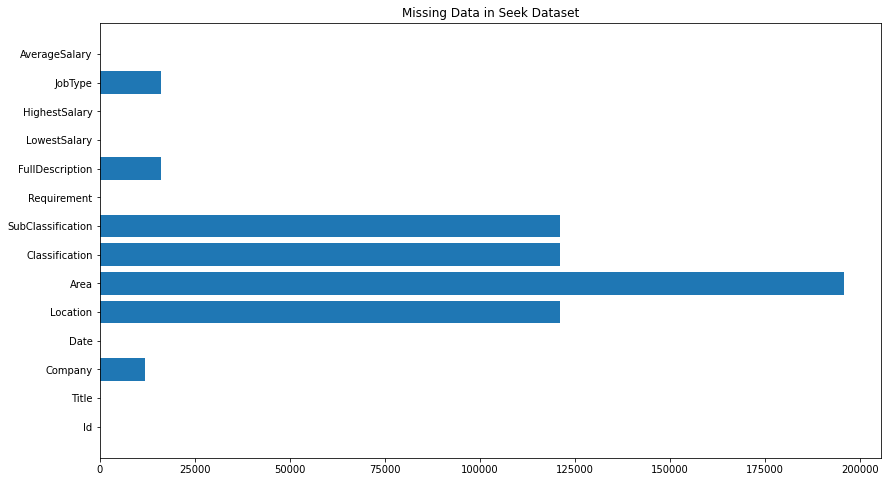

In [45]:
# Simply sum the NaN of each column, and graph it
from matplotlib.pyplot import figure
NaN_count = dict()

for item in df.columns:
    NaN_count[item] = df[item].isna().sum()
    print('There are {} NaN values in the {} column'.format(df[item].isna().sum(), item))

plt.figure(figsize=(14,8))
plt.barh(range(len(NaN_count)), list(NaN_count.values()), align='center')
plt.yticks(range(len(NaN_count)), list(NaN_count.keys()))
plt.title('Missing Data in Seek Dataset')
plt.show()